In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.PVC_points import PVC_points as PVC

In [2]:
# Constantes :
NUMBER_OF_POINTS = 10
NUMBER_OF_ESSAIES = 100

# Génération des points :
np.set_printoptions(precision=2)
for i in range(NUMBER_OF_ESSAIES):
    PVC.generer_fichier(NUMBER_OF_POINTS, f"points_{i + 1}")

In [3]:
cycles_ppp = []
cycles_opt_ppp = []
cycles_opt_prim = []
cycles_hds = []

GF = PVC()
for i in range(NUMBER_OF_ESSAIES):       
    GF.charger_de_fichier(f"./data/points_{i + 1}.txt")
    points = GF.points_   
    c_ppp = GF.PPP()
    cycles_ppp.append(GF.longueur(c_ppp))

    c_opt_ppp = GF.OptPPP()
    cycles_opt_ppp.append(GF.longueur(c_opt_ppp))

    c_opt_prim = GF.OptPrim()
    cycles_opt_prim.append(GF.longueur(c_opt_prim))

    c_hds = GF.HDS()
    cycles_hds.append(GF.longueur(c_hds))

In [4]:
stats = np.vstack([np.array(cycles_ppp), np.array(cycles_opt_ppp), \
                   np.array(cycles_opt_prim), np.array(cycles_hds)]).T

means = stats.mean(axis=0)
lp, lop, lpr, lhds = means
print(f"La longueur moyenne des cycles obtenus a partir de PPP : {lp:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de OptPPP : {lop:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de PVC_Prim : {lpr:.3f}")
print(f"La longueur moyenne des cycles obtenus a partir de HDS : {lhds:.3f}")

La longueur moyenne des cycles obtenus a partir de PPP : 3.384
La longueur moyenne des cycles obtenus a partir de OptPPP : 3.084
La longueur moyenne des cycles obtenus a partir de PVC_Prim : 3.329
La longueur moyenne des cycles obtenus a partir de HDS : 2.827


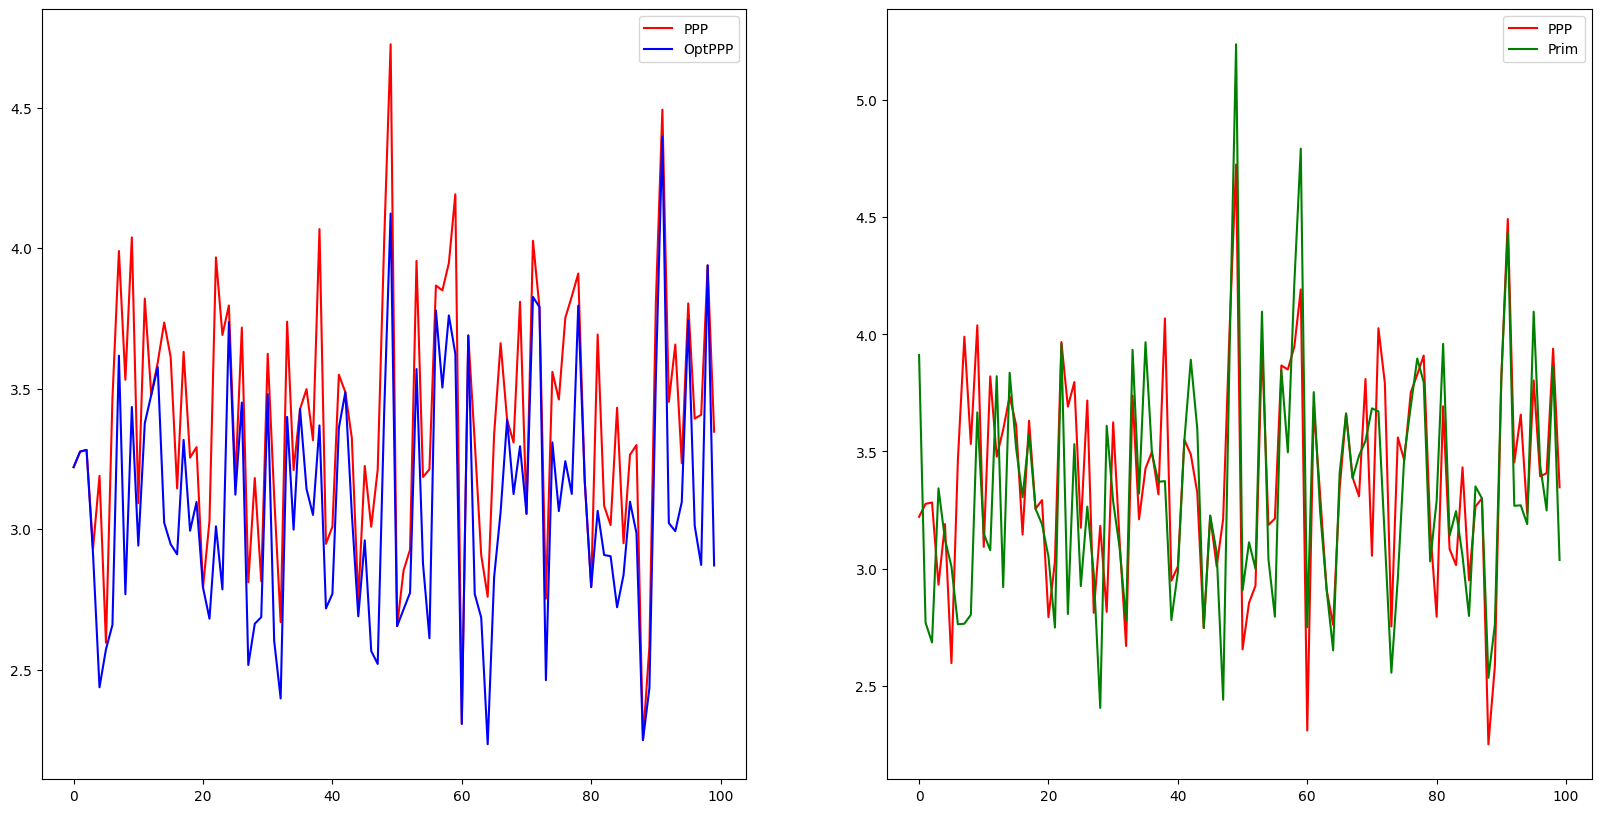

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_ppp, c='blue', label='OptPPP')
plt.legend()
plt.subplot(122)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_prim, c='green', label='Prim')
plt.legend()

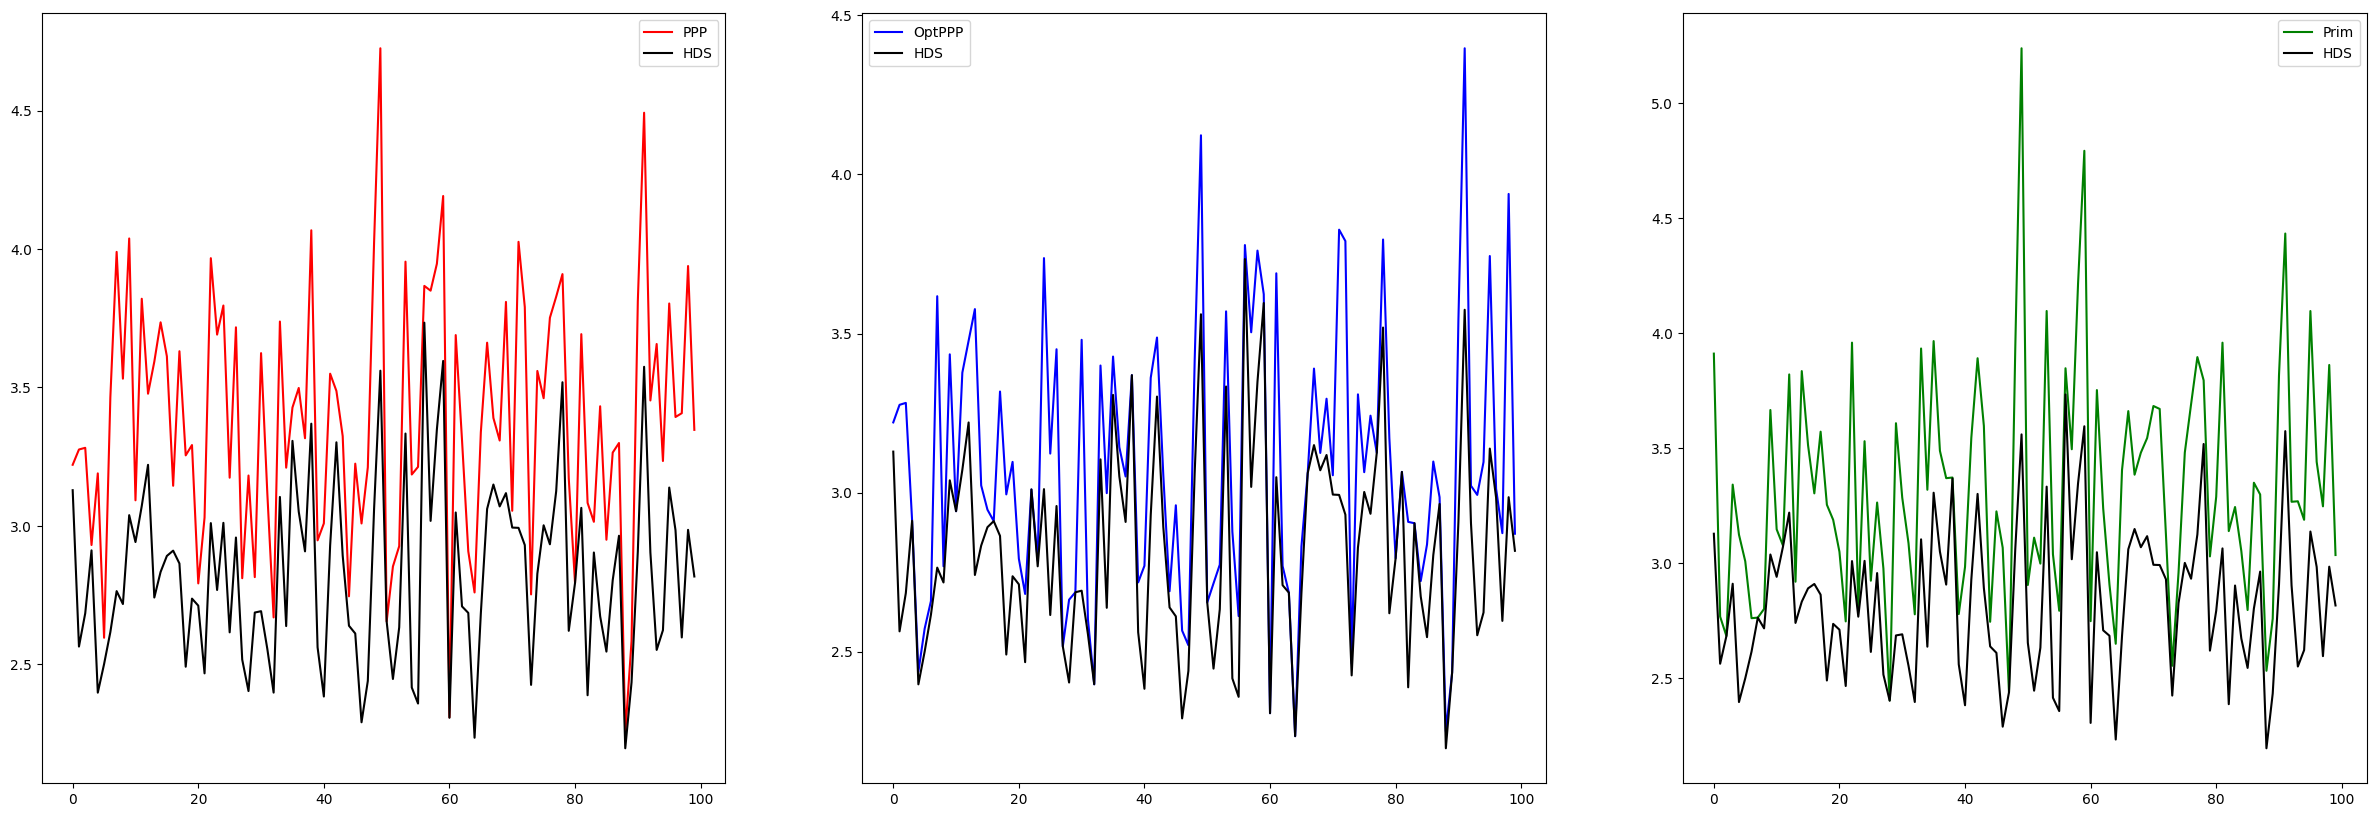

In [6]:
plt.figure(figsize=(30, 10))
plt.subplot(131)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_ppp, c='red', label='PPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()
plt.subplot(132)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_ppp, c='blue', label='OptPPP')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()
plt.subplot(133)
plt.plot(range(NUMBER_OF_ESSAIES), cycles_opt_prim, c='green', label='Prim')
plt.plot(range(NUMBER_OF_ESSAIES), cycles_hds, c='black', label='HDS')
plt.legend()

(array([ 4., 14., 16., 15., 18., 18.,  5.,  5.,  3.,  2.]),
 array([2.2 , 2.35, 2.5 , 2.66, 2.81, 2.97, 3.12, 3.27, 3.43, 3.58, 3.73]),
 <BarContainer object of 10 artists>)

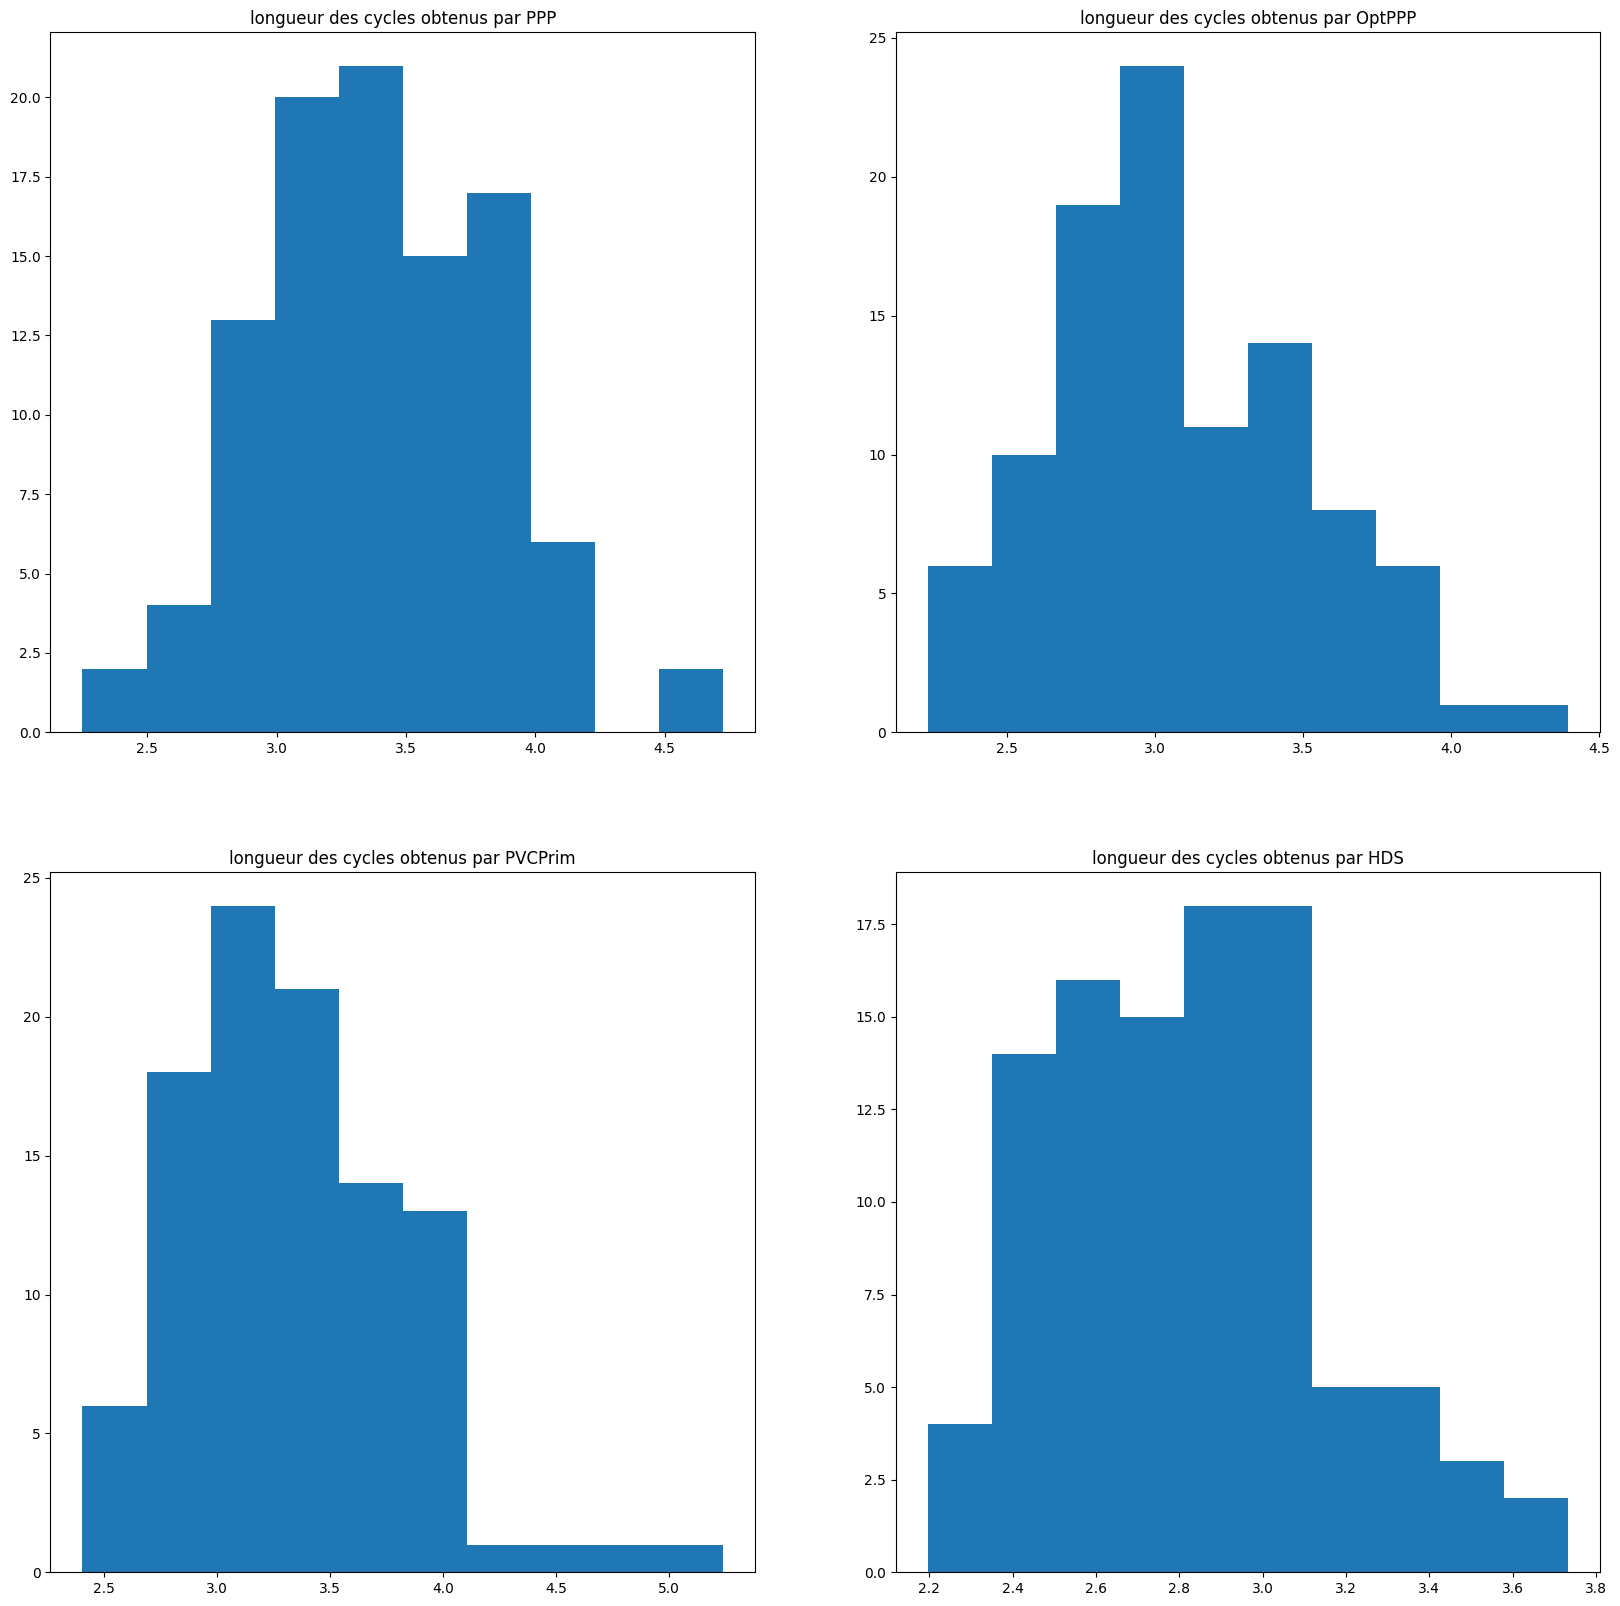

In [7]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title("longueur des cycles obtenus par PPP")
plt.hist(cycles_ppp)
plt.subplot(222)
plt.title("longueur des cycles obtenus par OptPPP")
plt.hist(cycles_opt_ppp)
plt.subplot(223)
plt.title("longueur des cycles obtenus par PVCPrim")
plt.hist(cycles_opt_prim)
plt.subplot(224)
plt.title("longueur des cycles obtenus par HDS")
plt.hist(cycles_hds)

In [8]:
print("*** Etude des gains ***")
print("NB : les gains positifs expriment les longueurs gagnées " \
"et donc des améliorations tandis que les gains négatifs représentent des dégradations")

difference_longueur_ppp_optppp = (stats[:, 1] - stats[:, 0]) / stats[:, 0] * 100
difference_longueur_ppp_prim = (stats[:, 2] - stats[:, 0]) / stats[:, 0] * 100
difference_longueur_ppp_hds = (stats[:, 3] - stats[:, 0]) / stats[:, 0] * 100

print("______")
print("Gains par rapport a PPP :")
print(f"gain de OptPPP par rapport a PPP : {-1 * difference_longueur_ppp_optppp.mean():.2f}%")
print(f"gain de PVC_Prim par rapport a PPP : {-1 * difference_longueur_ppp_prim.mean():.2f}%")
print(f"gain de HDS par rapport a PPP : {-1 * difference_longueur_ppp_hds.mean():.2f}%")

difference_longueur_optppp_prim = (stats[:, 2] - stats[:, 1]) / stats[:, 1] * 100
difference_longueur_optppp_hds = (stats[:, 3] - stats[:, 1]) / stats[:, 1] * 100

print("______")
print("Gains par rapport a OptPPP :")
print(f"gain de PVC_Prim par rapport a OptPPP : {-1 * difference_longueur_optppp_prim.mean():.2f}%")
print(f"gain de HDS par rapport a OptPPP : {-1 * difference_longueur_optppp_hds.mean():.2f}%")

difference_longueur_prim_hds = (stats[:, 3] - stats[:, 2]) / stats[:, 2] * 100

print("______")
print("Gains par rapport a PVC_Prim :")
print(f"gain de HDS par rapport a PVC_Prim : {-1 * difference_longueur_prim_hds.mean():.2f}%")

*** Etude des gains ***
NB : les gains positifs expriment les longueurs gagnées et donc des améliorations tandis que les gains négatifs représentent des dégradations
______
Gains par rapport a PPP :
gain de OptPPP par rapport a PPP : 8.64%
gain de PVC_Prim par rapport a PPP : 1.19%
gain de HDS par rapport a PPP : 15.89%
______
Gains par rapport a OptPPP :
gain de PVC_Prim par rapport a OptPPP : -8.42%
gain de HDS par rapport a OptPPP : 7.76%
______
Gains par rapport a PVC_Prim :
gain de HDS par rapport a PVC_Prim : 14.42%


In [20]:
import time

t_ppp = []
t_opt_ppp = []
t_opt_prim = []
t_hds = []

MAX_GENERATE = 16
for i in range(4, MAX_GENERATE + 1):
    PVC.generer_fichier(i, f"{i}points")   

GF = PVC()
for i in range(4, MAX_GENERATE + 1):    
    GF.charger_de_fichier(f"./data/{i}points.txt")
    points = GF.points_
    # ppp
    start = time.time()   
    c_ppp = GF.PPP()
    end = time.time()
    t_ppp.append((end - start) * 1000)

    # opt_ppp
    start = time.time()  
    c_opt_ppp = GF.OptPPP()
    end = time.time()  
    t_opt_ppp.append((end - start) * 1000)

    # opt_prim
    start = time.time()  
    c_opt_prim = GF.OptPrim()
    end = time.time()  
    t_opt_prim.append((end - start) * 1000)

    # branch_and_bound
    start = time.time()  
    c_hds = GF.HDS()
    end = time.time()  
    t_hds.append((end - start) * 1000) 

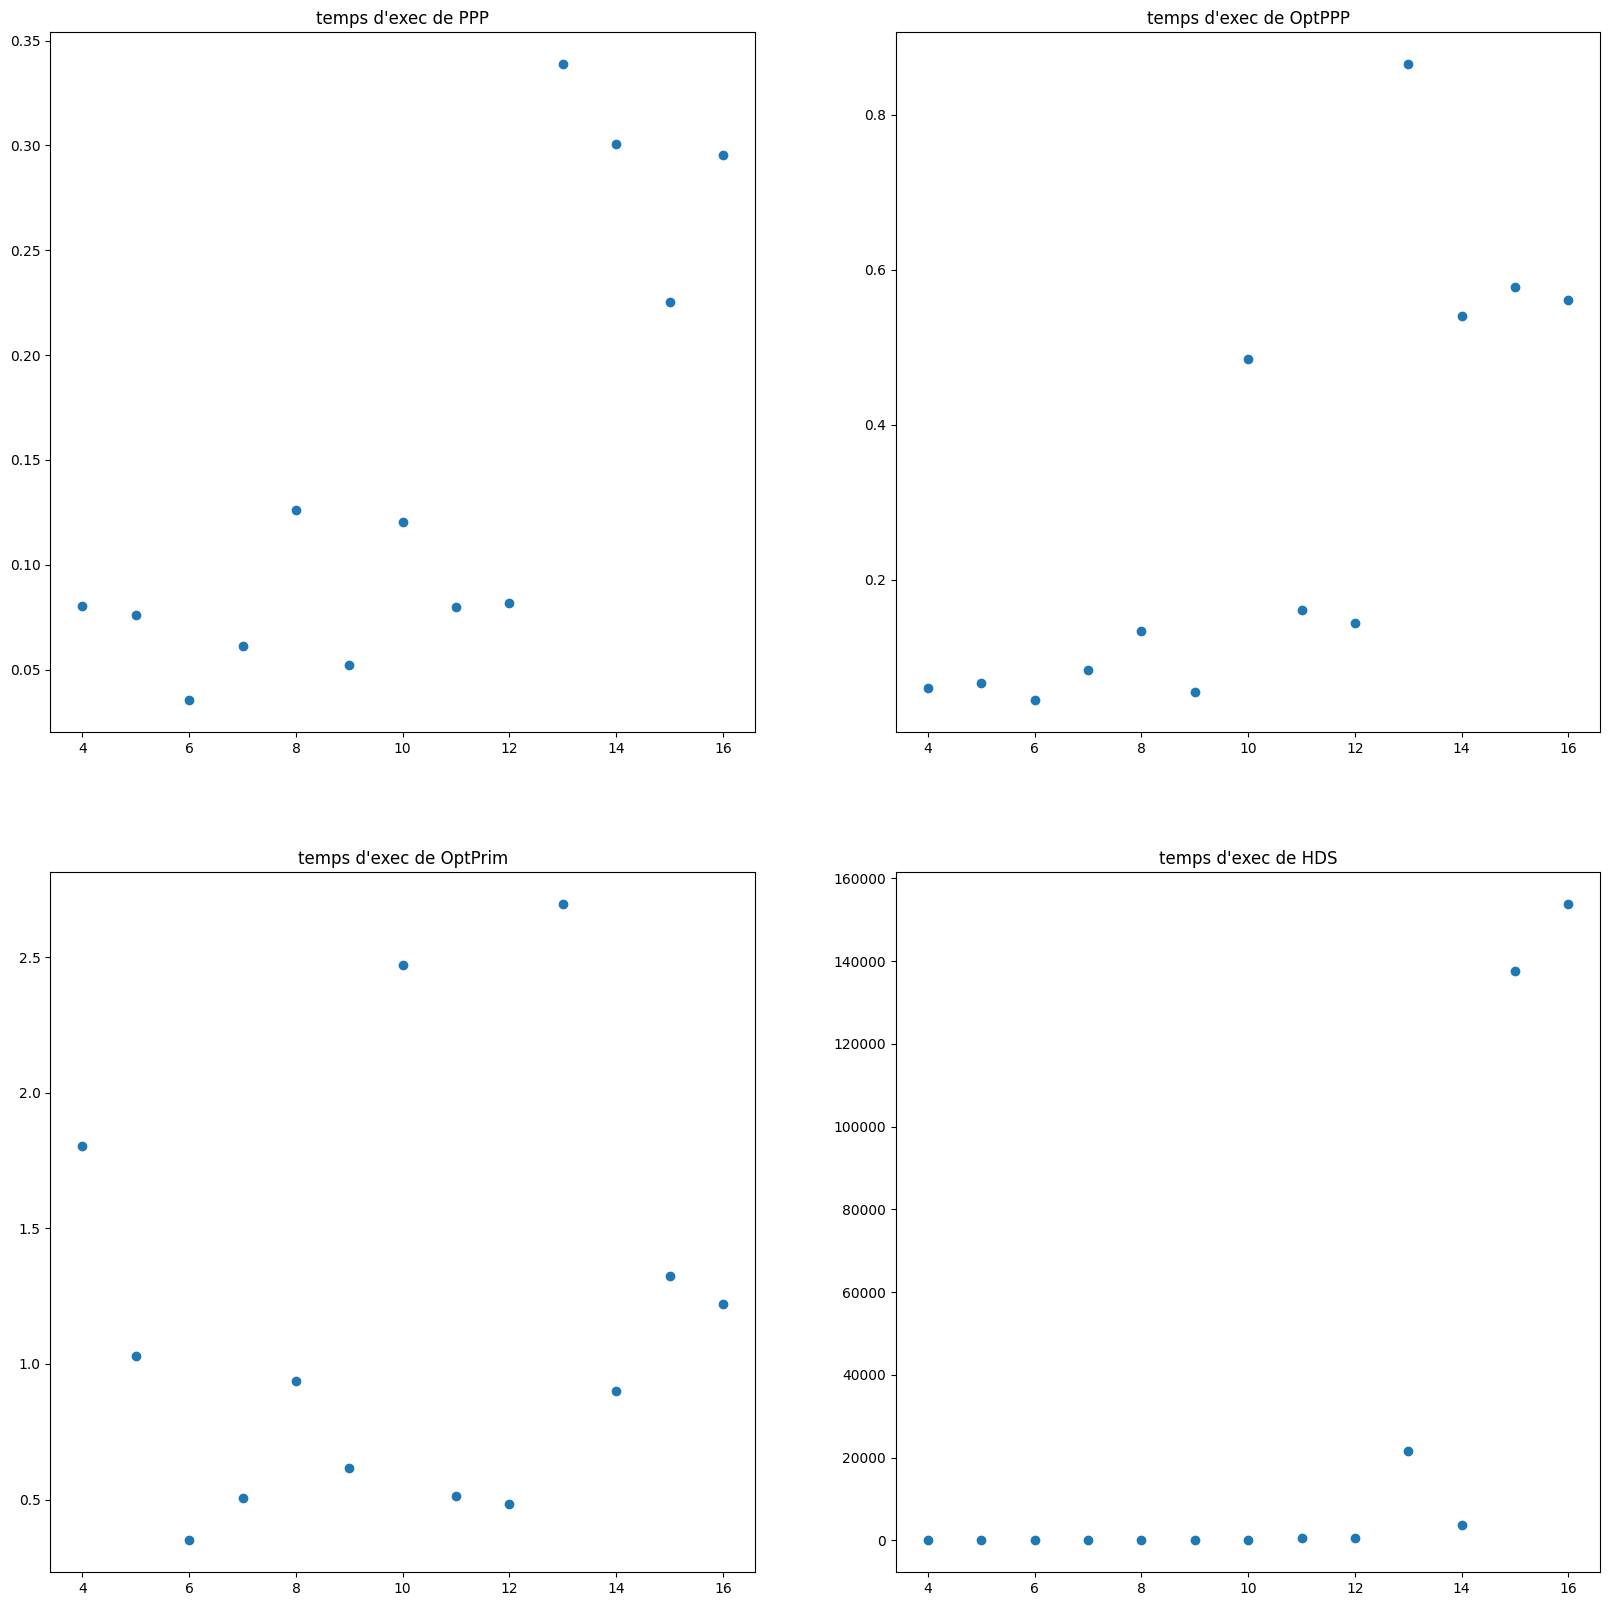

In [24]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title("temps d'exec de PPP")
plt.scatter(range(4, MAX_GENERATE + 1), t_ppp)
plt.subplot(222)
plt.title("temps d'exec de OptPPP")
plt.scatter(range(4, MAX_GENERATE + 1), t_opt_ppp)
plt.subplot(223)
plt.title("temps d'exec de OptPrim")
plt.scatter(range(4, MAX_GENERATE + 1), t_opt_prim)
plt.subplot(224)
plt.title("temps d'exec de HDS")
plt.scatter(range(4, MAX_GENERATE + 1), t_hds)